In [3]:
# loading libraries
import numpy as np # using numpy for matrix format manipulation of image 
import matplotlib.pyplot as plt # for ploting the image
import cv2  # loading the computer vision libraries
%matplotlib inline 

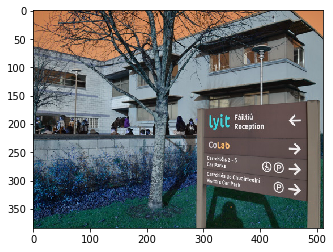

In [28]:
img1 = cv2.imread('lyit.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)

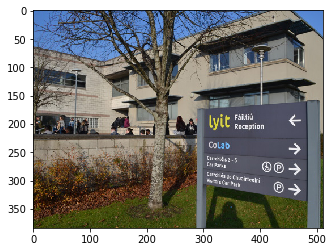

In [5]:
plt.imshow(img1_rgb)

## Question 1

In [6]:
img1_rgb.shape

(384, 512, 3)

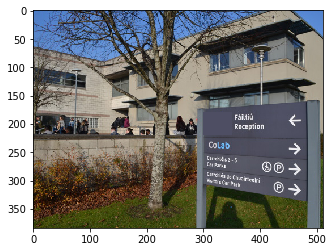

In [52]:
imgq1 = cv2.imread('lyit.jpg', cv2.IMREAD_UNCHANGED)
imgq1 = cv2.cvtColor(imgq1, cv2.COLOR_BGR2RGB)
hide=cv2.rectangle(imgq1, (300,180), (350, 220), (78, 78, 99, 1), -1)
plt.imshow(hide)

## Question 2

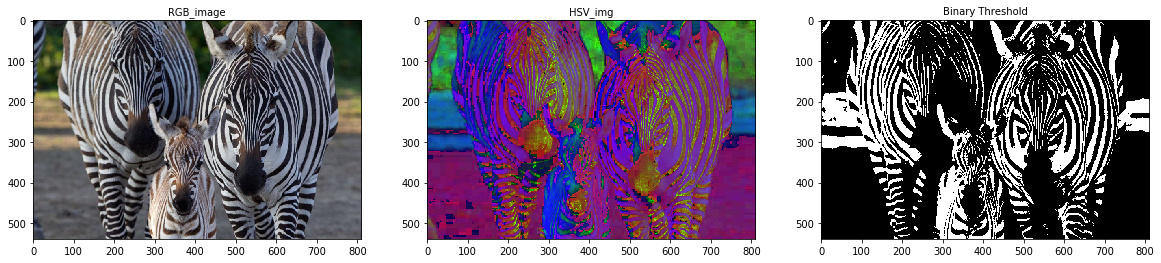

In [49]:
zebras = cv2.imread('zebras.jpg')
bw_zebras = cv2.imread('zebras.jpg',0)
zebras_rgb = cv2.cvtColor(zebras, cv2.COLOR_BGR2RGB)
hsvImage = cv2.cvtColor(zebras, cv2.COLOR_BGR2HSV)
binarythresh = cv2.threshold(bw_zebras,127,255,cv2.THRESH_BINARY)

fig = plt.figure(figsize=(20,30))
ax1 = fig.add_subplot(1,3,1)
plt.title('RGB_image', fontsize=10)
ax1.imshow(zebras_rgb)
ax2 = fig.add_subplot(1,3,2)
plt.title('HSV_img', fontsize=10)
ax2.imshow(hsvImage,cmap='gray')
ax3 = fig.add_subplot(1,3,3)
plt.title('Binary Threshold', fontsize=10)
ax3.imshow(binarythresh[1],cmap='gray')

## Question 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


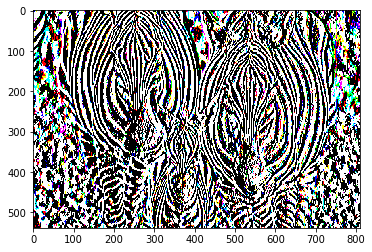

In [55]:
img_q3 = cv2.imread('Zebras.jpg')
sobelx = cv2.Sobel(img_q3,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx,cmap='gray')

## Question 4

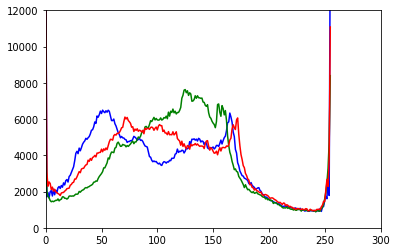

In [81]:
img_q4 =  cv2.imread('Letterkenny.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_q4],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,300]) 
    plt.ylim([0,12000])
plt.show()

## Question 5

In [67]:
# This function is based on a CV2 Event (Left button click)
def get_point(event,x,y,flags,param):
    global pt1,pt2,topLeft_clicked,botRight_clicked
    if event == cv2.EVENT_LBUTTONDOWN:
        topLeft_clicked = True 
        pt1 = (x,y)
            
pt1 = (0,0)
topLeft_clicked = False
botRight_clicked = False

cap = cv2.VideoCapture(0) 
cv2.namedWindow('Webcam')
cv2.setMouseCallback('Webcam', get_point) 

while True:
    ret, frame = cap.read()
    
    if topLeft_clicked:
        cv2.circle(frame, center=pt1, radius=100, color=(0,255,0), thickness=1)
    
    cv2.imshow('Webcam', frame)

    # Press ESC to quit.
    if cv2.waitKey(25) & 0xFF == 27:

        break

cap.release()
cv2.destroyAllWindows()

In [68]:
pt1

(317, 248)

## Question 6

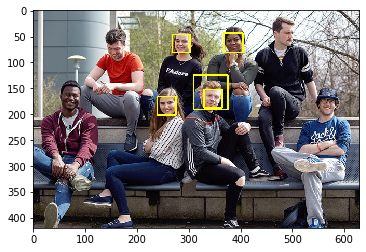

In [83]:
face_cascade_profile = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):      
    face_img = img.copy()  
    face_rects = face_cascade_profile.detectMultiScale(face_img)     
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,0), 2)    
    face_rects = face_cascade_profile.detectMultiScale(face_img)          
    return face_img

lyitStudents = cv2.imread('LyitStudents.jpg')
correctimg = cv2.cvtColor(lyitStudents, cv2.COLOR_BGR2RGB)
plt.imshow(correctimg)
plt.imshow(detect_face(correctimg),cmap='gray')

## Question 7

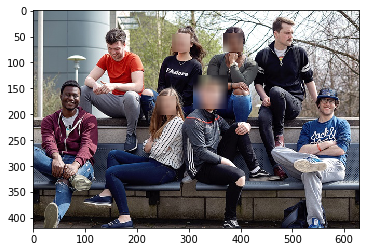

In [84]:
face_cascade_profile = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):      
    face_img = img.copy()  
    face_rects = face_cascade_profile.detectMultiScale(face_img)     
    for (x,y,w,h) in face_rects:   
        face = face_img[y:y+w,x:x+h]
        blurred_face = cv2.blur(face,(20, 20))  
        face_img[y:y+w,x:x+h] = blurred_face
        
    face_rects = face_cascade_profile.detectMultiScale(face_img)          
    return face_img
    
lyitStudents = cv2.imread('LyitStudents.jpg')
correctimg = cv2.cvtColor(lyitStudents, cv2.COLOR_BGR2RGB)
plt.imshow(correctimg)
plt.imshow(detect_face(correctimg),cmap='gray')

## Question 8

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [4]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [5]:
image_gen.flow_from_directory('GlassOrTable/train')
image_gen.flow_from_directory('./GlassOrTable/test')

Found 6400 images belonging to 2 classes.
Found 1243 images belonging to 2 classes.


In [6]:
image_shape = (150,150,3)

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [10]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('./GlassOrTable/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6400 images belonging to 2 classes.


In [11]:
test_image_gen = image_gen.flow_from_directory('./GlassOrTable/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1243 images belonging to 2 classes.


In [12]:
train_image_gen.class_indices

{'glass': 0, 'table': 1}

In [13]:
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [15]:
results = model.fit_generator(train_image_gen,epochs=5,
                              steps_per_epoch=20,
                              validation_data=test_image_gen,
                              validation_steps=12)

Epoch 1/5
20/20 [==============================] - 111s 6s/step - loss: 0.5425 - accuracy: 0.7656 - val_loss: 0.4089 - val_accuracy: 0.8125
Epoch 2/5
20/20 [==============================] - 97s 5s/step - loss: 0.4616 - accuracy: 0.8031 - val_loss: 0.4339 - val_accuracy: 0.8906
Epoch 3/5
20/20 [==============================] - 92s 5s/step - loss: 0.4418 - accuracy: 0.7906 - val_loss: 0.5038 - val_accuracy: 0.7656
Epoch 4/5
20/20 [==============================] - 119s 6s/step - loss: 0.4622 - accuracy: 0.8094 - val_loss: 0.4460 - val_accuracy: 0.7917
Epoch 5/5
20/20 [==============================] - 95s 5s/step - loss: 0.4547 - accuracy: 0.8031 - val_loss: 0.3120 - val_accuracy: 0.8385


In [32]:
model.save('table_glassClassifier.h5')

In [41]:
results.history['val_accuracy']

[0.8125, 0.890625, 0.765625, 0.7916666865348816, 0.8385416865348816]

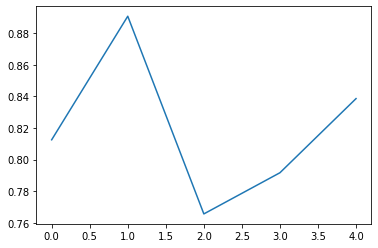

In [34]:
plt.plot(results.history['val_accuracy'])

In [36]:
import numpy as np
from keras.preprocessing import image

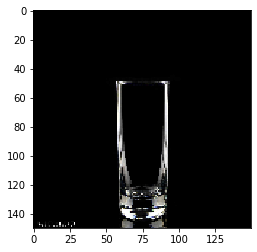

In [39]:
glass_imgfile = './glass.jpg'
glassimg = image.load_img(glass_imgfile, target_size=(150, 150))
plt.imshow(glassimg)
glassimg = image.img_to_array(glassimg)
glassimg = np.expand_dims(glassimg, axis=0)
glassimg= glassimg/255

In [40]:
prediction_prob = model.predict(glassimg)
print(f'Probability that image is a glass is: {prediction_prob} ')

Probability that image is a glass is: [[0.00369364]] 


We use the training set to train our model. The training set is using to create a stable model by tuning the hyperparameters. Using the training set, we can evaluate the performance of our model for different hyperparameter values. If the hyperparameters are just optimized on the training set, it will lead to overtting while using the test data set.

If we judge the performance of our models using the training set loss/error. Most of the cases the training error gradually decreases as the size of the model increases. 


Train loss is the value of loss function in each epoch for the training data set. The loss function is a continues differentiable function dened
based on the backpropagation algorithm. CNN will train to minimize the loss value. the loss value can be positive or negative based on the
corresponding to the objective function. Train error is the
measurement of what percentage of the training example our model gets incorrect. Train error is always between zero and one. 
The training error and loss are measured and recorded on the training set.
In other words, the error is the difference between actual/true value and predicted value. the loss is the measure of how well a model ts the
data.


A learning curve is a diagnostic tool using to evaluate the performance of a model. Here we are using loss and error plots between training and
validation sets. A learning curve is a plot with time or experience on the x-axis and learning or improvement on the y-axis.
The undert refers to a model that can not learn the training dataset. If the model is undertting the training loss will be almost a at line or
decreasing to the end of the plot after reaching the saturation. Overtting means a model learned the training data very well but poor
predictability and classication eciency with new data. The generalization ability of an overt model is very less. In a good t model, the
training and validation loss will decrease to a point of stability with a minimum gap between them.